### Geometric transformations
Geometric transformation refers to the process of altering the spatial relationships between pixels in an image, while preserving properties such as parallelism, straightness of lines, distances between points etc..

Operations :
- Shift
- Scale
- Rotate
- Shear
- Reflect

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Read the image
image = cv2.imread('parrot.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width = image.shape[0], image.shape[1]

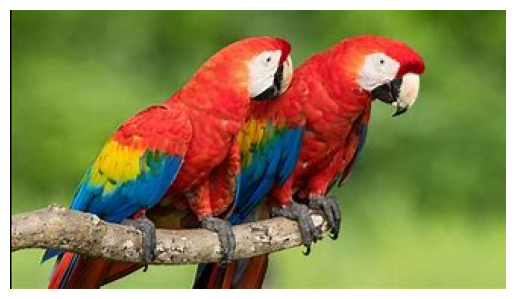

In [ ]:
# Define the transformation matrices

# No Change
# [[1,0,0],
#  [0,1,0],
#  [0,0,1]]

nochange_matrix = np.float32([[1, 0, 1],
                             [0, 1, 0]])

# Apply the transformations
nochange_image = cv2.warpAffine(image, nochange_matrix, (width, height))

plt.imshow(nochange_image)
plt.axis("off")
plt.show()

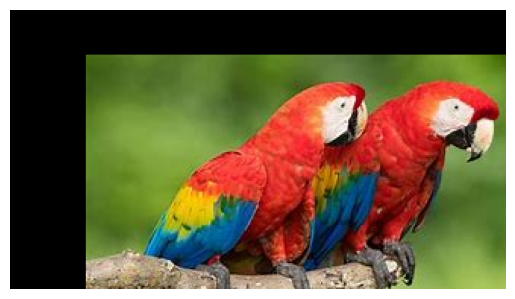

In [ ]:
# Shift matrix

# [[1,0,X],
#  [0,1,Y],
#  [0,0,1]]

shift_matrix = np.float32([[1, 0, 50],  # shift right by 50 pixels
                           [0, 1, 30]]) # shift down by 30 pixels

shift_image = cv2.warpAffine(image, shift_matrix, (width, height))

plt.imshow(shift_image)
plt.axis("off")
plt.show()
plt.imsave("Shift.png",shift_image)

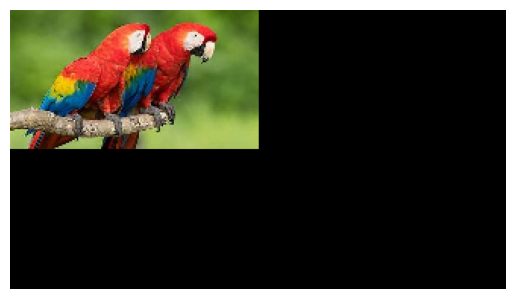

In [ ]:
# Scale about origin

# Scale
# [[W,0,0],
#  [0,H,0],
#  [0,0,1]]

scale_matrix = np.float32([[0.5, 0, 0],   # scale horizontally by 0.5
                           [0, 0.5, 0]])  # scale vertically by 0.5

scale_image = cv2.warpAffine(image, scale_matrix, (width, height))

plt.imshow(scale_image)
plt.axis("off")
plt.show()
plt.imsave("Scale.png",scale_image)

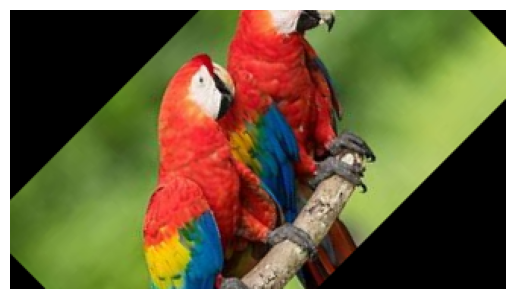

In [ ]:
# Rotate matrix

# [[cos(theta),-sin(theta), 0],
#  [sin(theta), cos(theta), 0],
#  [         0,          0, 1]]

rotate_matrix = cv2.getRotationMatrix2D(center=(width/2, height/2), angle=45, scale=1)

rotate_image = cv2.warpAffine(image, rotate_matrix, (width, height))

plt.imshow(rotate_image)
plt.axis("off")
plt.show()
plt.imsave("Rotate.png",rotate_image)

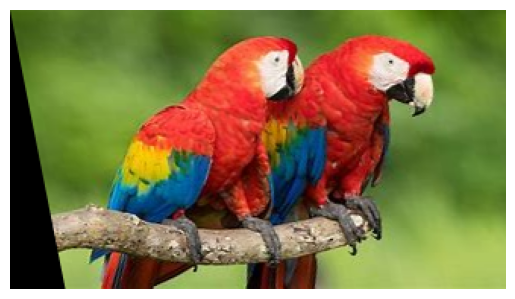

In [ ]:
# Shear in x-direction

# Shear matrix
angle = pi/16
shear_matrix = np.float32([[1, np.tan(angle), 0],
                           [0,            1, 0]])

sheared_imageX = cv2.warpAffine(image, shear_matrix, (image.shape[1], image.shape[0]))

plt.imshow(sheared_imageX)
plt.axis("off")
plt.show()
plt.imsave("ShearX.png",sheared_imageX)

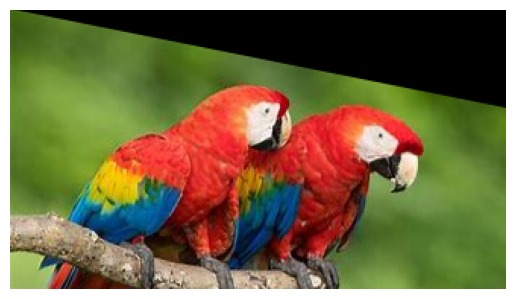

In [ ]:
# Shear in y-direction

# Shear matrix
angle = pi/16
shear_matrix = np.float32([[1, 0, 0],
                           [np.tan(angle), 1, 0]])

sheared_imageY = cv2.warpAffine(image, shear_matrix, (image.shape[1], image.shape[0]))

plt.imshow(sheared_imageY)
plt.axis("off")
plt.show()
plt.imsave("ShearY.png",sheared_imageY)

In [ ]:
# Reflect about origin
# [[-1, 0, 0],
#  [0, -1, 0],
#  [0,  0, 1]]

# Reflect x-axis
# [[1, 0, 0],
#  [0, -1, 0],
#  [0,  0, 1]]

# Reflect about origin
# [[-1, 0, 0],
#  [0,  1, 0],
#  [0,  0, 1]]

###Resizing images using different methods

While resizing or transforming images, Interpolation is a method that is used in calculating pixel values at new positions. Three common types of Interpolation are:

- **Nearest Neighbor:** Fast but blocky; uses the nearest pixel.

- **Bilinear:** Smooth but slightly blurry; averages 4 nearby pixels.

- **Bicubic:** Best quality but slower; uses 16 nearby pixels for smoothness.

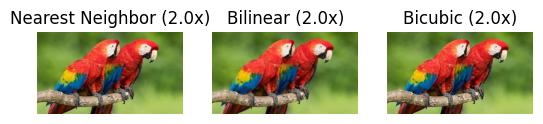

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('parrot.jpg')

# Define scaling factors
scaling_factors = [0.5, 2.0]

# Define interpolation methods
interpolation_methods = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC]

# Perform resizing with different methods
for factor in scaling_factors:
    for method in interpolation_methods:
        # Perform scaling
        scaled_image = cv2.resize(image, None, fx=factor, fy=factor, interpolation=method)

        # Display the resized image
        method_name = ""
        if method == cv2.INTER_NEAREST:
            method_name = "Nearest Neighbor"
        elif method == cv2.INTER_LINEAR:
            method_name = "Bilinear"
        elif method == cv2.INTER_CUBIC:
            method_name = "Bicubic"

        plt.subplot(2, 3, interpolation_methods.index(method) + 1)
        plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
        plt.title(f"{method_name} ({factor}x)")
        plt.axis('off')

plt.show()

## Affine Transformation



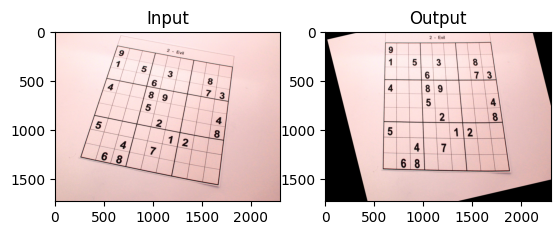

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('sudoku.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[80,130],[210,100],[120,290]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## Perspective Transformation

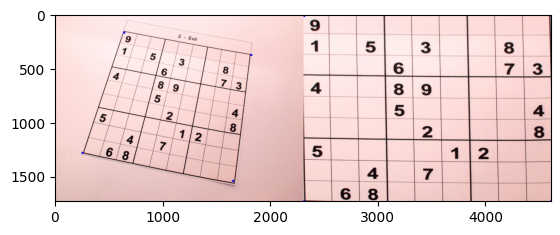

In [ ]:
image = cv2.imread('sudoku.jpg')
height, width, _ = image.shape

pts1 = np.float32([[642,163],[1820,371],[255,1280],[1650,1540]])
pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])

for val in pts1:
    floor = cv2.circle(image, (int(val[0]), int(val[1])), 10, (0,0,255), -1)

perspectiveMatrix = cv2.getPerspectiveTransform(pts1,pts2)
transformedImage = cv2.warpPerspective(image,perspectiveMatrix,(width,height))

result = cv2.hconcat([image,transformedImage])

plt.imshow(result)
plt.imsave("PerspectiveTransformation.png",result)